# <center>[🎰 Automatic feature generaton ](https://stepik.org/lesson/681943/)</center>

Как говорил Конфуций: ***"Зачем делать что-то самому, если можно заставить сделать это самое что-то кого-то другого?"***

<center> <img src='https://i.pinimg.com/474x/25/1b/63/251b631e41794b934f4632a28a2c5127.jpg' align='right' width="400" height="400" /> </center> <br>

<p><font size="3" face="Arial" font-size="large"><ul type="square">
    
<li><a href="#c1">🧰 Featuretools - для данных в виде sql-базы. </a></li>
<li><a href="#c2">🌐 GeoPandas - для работы с геоданными. </a></li>
<li><a href="#с3">🥋 Karateclub и NetworkX - для графов.</a>
<li><a href="#c4"> 🥒 Tsfresh - для временных рядов.</a>
<li><a href="#6">🧸 Выводы и заключения.</a>
    
</li></ul></font></p>

<div class="alert alert-info">
    
* Предположим, вы достали все какие только можно визуализированные зависимости из ваших сырых данных, но на ум ничего дельного так и не пришло. \
* Следующий логический шаг - это попробовать посмотреть на комбинации параметров типа перемножения, сумм, каких либо средних, подсчитать частоту какого-нибудь категориального признака.
* Выгладит как то муторно, да и творчеством пока даже и не пахнет.
Что если я скажу тебе, юный падаван, что все это можно сгенерировать в автоматическом режиме ... \
(Что ты, скорее всего, и так уже понял из названия урока:)) \
* Не будем тянуть сову за глобус, посмотрим на либы, которые умеют автоматически генерировать признаки.

# <center> 🧰 Feature-tools. </center> <p id="c1"></p>
<center> <img src='../images/Ftool.png' width="750" height="250" /> </center> <br>

`Feature tools` создана для данных в виде sql-базы, т.е. несколько табличек соединяющиеся по id-шникам.\
А у нас как раз такое есть, помните картинку?
<center> <img src='https://ucarecdn.com/f2a5590c-c8e9-40e7-bfa8-b92f93fa1f13/' /> </center>

<div class="alert alert-info">

Давайте попробуем запихнуть наши таблицы в `feature tools` и вытащить признаки, которые мы вручную делали в quickstart.

In [1]:
!pip install featuretools -q # Установка

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.1/620.1 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.4/236.4 kB 8.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
import featuretools as ft

Загружаем 4 наших таблицы с данными:

In [3]:
data_root = "https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/"

path = data_root + 'car_train.csv'
car_info = pd.read_csv(path)

path = data_root + 'rides_info.csv'
rides_info = pd.read_csv(path)

path = data_root + 'driver_info.csv'
driver_info = pd.read_csv(path)

path = data_root + 'fix_info.csv'
fix_info = pd.read_csv(path)

Для начала нам нужно создать `EntitySet`. В нём будут наши таблицы и связи между ними.

In [4]:
es = ft.EntitySet(id="car_data")

<div class="alert alert-info">

Добавим в него таблицы.

В таблицах есть категориальные столбцы `model`, `fuel_tupe`, `car_type`, `years_to_work` и пр. Нам бы не хотелось их суммировать с чем-то или искать среднее, поэтому укажем для `feature-tools` типы данных с помощью библиотеки `woodwork` (устанавливается вместе с `feature-tools`).

In [5]:
# Посмотрим какие типы в представлены
ft.list_logical_types()

,name,type_string,description,physical_type,standard_tags,is_default_type,is_registered,parent_type
0,Address,address,Represents Logical Types that contain address ...,string,{},True,True,None
1,Age,age,Represents Logical Types that contain whole nu...,int64,{numeric},True,True,Integer
2,AgeFractional,age_fractional,Represents Logical Types that contain non-nega...,float64,{numeric},True,True,Double
3,AgeNullable,age_nullable,Represents Logical Types that contain whole nu...,Int64,{numeric},True,True,IntegerNullable
4,Boolean,boolean,Represents Logical Types that contain binary v...,bool,{},True,True,BooleanNullable
5,BooleanNullable,boolean_nullable,Represents Logical Types that contain binary v...,boolean,{},True,True,None
6,Categorical,categorical,Represents Logical Types that contain unordere...,category,{category},True,True,None
7,CountryCode,country_code,Represents Logical Types that use the ISO-3166...,category,{category},True,True,Categorical
8,CurrencyCode,currency_code,Represents Logical Types that use the ISO-4217...,category,{category},True,True,Categorical
9,Datetime,datetime,Represents Logical Types that contain date and...,datetime64[ns],{},True,True,None


<div class="alert alert-info">

Добавляем наши таблицы в `entity_dataset` с помощью метода `add_dataframe`, указывая типы данных для нечисловых колонок.

In [6]:
from woodwork.logical_types import Categorical, Double, Datetime, Age

es = es.add_dataframe(
    dataframe_name="cars",
    dataframe=car_info,
    index="car_id",
    logical_types={"car_type": Categorical, 'fuel_type': Categorical, 'model': Categorical}
    )

es = es.add_dataframe(
    dataframe_name="rides",
    dataframe=rides_info.drop(['ride_id'], axis=1),
    index='index',
    time_index="ride_date",
    )

es = es.add_dataframe(
    dataframe_name="drivers",
    dataframe=driver_info,
    index="user_id",
    logical_types={"sex": Categorical, "first_ride_date": Datetime, "age": Age}
    )

es = es.add_dataframe(
    dataframe_name="fixes",
    dataframe=fix_info,
    index="index",
    logical_types={"work_type": Categorical, "worker_id":Categorical}
    )
es

/usr/local/lib/python3.10/dist-packages/featuretools/entityset/entityset.py:1914: UserWarning: index index not found in dataframe, creating new integer column
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/woodwork/logical_types.py:386: TypeConversionWarning: Some rows in series 'first_ride_date' are incompatible with datetime format '%Y-%m-%d' and have been replaced with null values. You may be able to fix this by using an instantiated Datetime logical type with a different format string specified for this column during Woodwork initialization.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/featuretools/entityset/entityset.py:1914: UserWarning: index index not found in dataframe, creating new integer column
  warnings.warn(


Entityset: car_data
  DataFrames:
    cars [Rows: 2337, Columns: 10]
    rides [Rows: 739500, Columns: 14]
    drivers [Rows: 15153, Columns: 7]
    fixes [Rows: 146000, Columns: 7]
  Relationships:
    No relationships

Теперь добавим связи между фреймами.

In [7]:
es = es.add_relationship("cars", "car_id", "rides", "car_id")
es = es.add_relationship("drivers", "user_id", "rides", "user_id")
es = es.add_relationship("cars", "car_id", "fixes", "car_id")

es

/usr/local/lib/python3.10/dist-packages/featuretools/entityset/entityset.py:414: UserWarning: Logical type Categorical for child column car_id does not match parent column car_id logical type Unknown. Changing child logical type to match parent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/featuretools/entityset/entityset.py:414: UserWarning: Logical type Categorical for child column user_id does not match parent column user_id logical type Unknown. Changing child logical type to match parent.
  warnings.warn(


Entityset: car_data
  DataFrames:
    cars [Rows: 2337, Columns: 10]
    rides [Rows: 739500, Columns: 14]
    drivers [Rows: 15153, Columns: 7]
    fixes [Rows: 146000, Columns: 7]
  Relationships:
    rides.car_id -> cars.car_id
    rides.user_id -> drivers.user_id
    fixes.car_id -> cars.car_id

Сгенерируем фичи для машин.

In [8]:
feature_matrix, feature_defs = ft.dfs(
    entityset=es,
    target_dataframe_name="cars",
    max_depth=1,
)
feature_matrix.head()

,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class,COUNT(rides),...,MODE(fixes.work_type),MODE(fixes.worker_id),NUM_UNIQUE(fixes.work_type),NUM_UNIQUE(fixes.worker_id),SKEW(fixes.destroy_degree),SKEW(fixes.work_duration),STD(fixes.destroy_degree),STD(fixes.work_duration),SUM(fixes.destroy_degree),SUM(fixes.work_duration)
car_id,,,,,,,,,,,,,,,,,,,,,
y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug,174,...,reparking,LR,4,33,0.835907,0.826462,2.732847,10.171884,106.7,933.0
O41613818T,VW Polo VI,economy,petrol,3.90,2015,78218,2021,35.20,electro_bug,174,...,reparking,YH,5,34,0.997276,-0.296841,2.707233,8.574733,102.1,873.0
d-2109686j,Renault Sandero,standart,petrol,6.30,2012,23340,2017,38.62,gear_stick,174,...,repair,AP,5,35,0.472628,0.671481,2.978077,13.040983,130.9,915.0
u29695600e,Mercedes-Benz GLC,business,petrol,4.04,2011,1263,2020,30.34,engine_fuel,174,...,repair,LM,4,34,0.492743,0.639490,3.237750,14.764994,143.0,1007.0
N-8915870N,Renault Sandero,standart,petrol,4.70,2012,26428,2017,30.45,engine_fuel,174,...,repair,CD,4,34,0.478043,1.341642,3.216758,12.659537,135.8,981.0


In [9]:
feature_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2337 entries, y13744087j to z-1337463D
Data columns (total 87 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   model                          2337 non-null   category
 1   car_type                       2337 non-null   category
 2   fuel_type                      2337 non-null   category
 3   car_rating                     2337 non-null   float64 
 4   year_to_start                  2337 non-null   int64   
 5   riders                         2337 non-null   int64   
 6   year_to_work                   2337 non-null   int64   
 7   target_reg                     2337 non-null   float64 
 8   target_class                   2337 non-null   category
 9   COUNT(rides)                   2337 non-null   Int64   
 10  MAX(rides.deviation_normal)    2337 non-null   float64 
 11  MAX(rides.distance)            2337 non-null   float64 
 12  MAX(rides.rating)       

<div class="alert alert-info">
    
Также можно генерировать не всё фичи, а только нужные.

In [10]:
feature_matrix, feature_defs = ft.dfs(
    entityset=es,
    target_dataframe_name="cars",
    agg_primitives=["mode", "count"], # Ограничиваем число фичей
    max_depth=1, # Ограничиваем глубину
)
feature_matrix.head()

,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class,COUNT(rides),COUNT(fixes),MODE(fixes.work_type),MODE(fixes.worker_id)
car_id,,,,,,,,,,,,,
y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug,174,35,reparking,LR
O41613818T,VW Polo VI,economy,petrol,3.90,2015,78218,2021,35.20,electro_bug,174,35,reparking,YH
d-2109686j,Renault Sandero,standart,petrol,6.30,2012,23340,2017,38.62,gear_stick,174,35,repair,AP
u29695600e,Mercedes-Benz GLC,business,petrol,4.04,2011,1263,2020,30.34,engine_fuel,174,35,repair,LM
N-8915870N,Renault Sandero,standart,petrol,4.70,2012,26428,2017,30.45,engine_fuel,174,35,repair,CD


Также для фичей можно задавать глубину параметром `max_depth`, тогда фичи будут создаваться не только в пределах таблицы, а ещё и комбинируя признаки со связанных таблиц. А для отладки вычислений можно считать не на всем датасете, что может быть долго, а на нескольких примерах, список которых можно передать в параметр `instance_ids`.

In [11]:
feature_matrix, feature_defs = ft.dfs(
    entityset=es,
    target_dataframe_name="cars",
    agg_primitives=["mean", "sum", "mode"],
    instance_ids=["y13744087j", "d-2109686j", "N-8915870N"],
    max_depth=2,
)
feature_matrix.head()

,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class,MEAN(rides.deviation_normal),...,MEAN(rides.drivers.user_time_accident),MODE(rides.DAY(ride_date)),MODE(rides.MONTH(ride_date)),MODE(rides.WEEKDAY(ride_date)),MODE(rides.YEAR(ride_date)),MODE(rides.drivers.sex),SUM(rides.drivers.age),SUM(rides.drivers.user_rating),SUM(rides.drivers.user_rides),SUM(rides.drivers.user_time_accident)
car_id,,,,,,,,,,,,,,,,,,,,,
y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug,-0.120391,...,17.724138,1,1,2,2020,1,5831.0,1432.0,144078.0,2056.0
d-2109686j,Renault Sandero,standart,petrol,6.30,2012,23340,2017,38.62,gear_stick,-2.223954,...,9.775862,1,1,2,2020,1,5714.0,1364.7,163567.0,1701.0
N-8915870N,Renault Sandero,standart,petrol,4.70,2012,26428,2017,30.45,engine_fuel,12.455678,...,15.758333,1,1,2,2020,0,5968.0,1411.5,155944.0,1891.0


Все доступные типы фичей можно посмотреть в `list_primitives`.

In [12]:
ft.list_primitives().head()

,name,type,dask_compatible,spark_compatible,description,valid_inputs,return_type
0,num_consecutive_less_mean,aggregation,False,False,Determines the length of the longest subsequen...,<ColumnSchema (Semantic Tags = ['numeric'])>,<ColumnSchema (Logical Type = IntegerNullable)...
1,max_consecutive_true,aggregation,False,False,Determines the maximum number of consecutive T...,<ColumnSchema (Logical Type = Boolean)>,<ColumnSchema (Logical Type = Integer) (Semant...
2,n_most_common_frequency,aggregation,False,False,Determines the frequency of the n most common ...,<ColumnSchema (Semantic Tags = ['category'])>,<ColumnSchema (Logical Type = Categorical) (Se...
3,variance,aggregation,False,False,Calculates the variance of a list of numbers.,<ColumnSchema (Semantic Tags = ['numeric'])>,<ColumnSchema (Logical Type = Double) (Semanti...
4,max_consecutive_zeros,aggregation,False,False,Determines the maximum number of consecutive z...,"<ColumnSchema (Logical Type = Double)>, <Colum...",<ColumnSchema (Logical Type = Integer) (Semant...


<div class="alert alert-info">

Так же в `feature-tools` реализован собственный механизм отбора фичей, который имеет 3 функции:

* `ft.selection.remove_highly_null_features()` - отбрасывает признаки с большим количеством пропусков
* `ft.selection.remove_single_value_features()` - отбрасывает константные признаки
* `ft.selection.remove_highly_correlated_features()` - отбрасывает сильно скоррелированные признаки<br>

В аргументы функции передаем датафрейм и она отрабатывает соответственно названию.

В библиотеке реализовано ещё много полезных фишек, подробнее можно ознакомиться в [документации](https://featuretools.alteryx.com/en/stable/index.html).

 # <center>🌐 [GeoPandas](https://geopandas.org/en/stable/index.html)</center> <p id="c2"></p>
 <center> <img src='https://github.com/geopandas/geopandas/blob/main/doc/source/_static/logo/geopandas_logo.png?raw=true' /> </center>

 Часто в датасетах чемпионатов по анализу данных присутствуют географические координаты или привязки к местоположению.
 Для работы с ними можно использовать библиотеку `GeoPandas`, которая объединяет в себе `Pandas` и `Shapely`, библиотеку для геопространственных расчётов.


In [13]:
!pip install geopandas folium scikit-learn -q

In [14]:
import geopandas as gpd
from sklearn.datasets import fetch_california_housing

<div class="alert alert-info">
    
Обратим наш пристальный взор на `California Housing Dataset`, это набор данных для прогнозирования цен на жильё. Давайте импортируем его из scikit-learn.

In [15]:
df = fetch_california_housing(as_frame=True).data
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Нас интересуют два последних столбца Latitude и Longitude, широта и долгота.

In [16]:
# создадим GeoDataFrame
gdf = gpd.GeoDataFrame(
        df,
        geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']),
        crs=4326
    ).to_crs(epsg=3857)
gdf.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,geometry
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,POINT (-13606581.360 4562487.679)
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,POINT (-13605468.165 4559667.342)
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,POINT (-13607694.555 4558257.461)


Как видите он особо ничем не отличается от обычного DataFrame, единственное отличие в столбце geometry, который представляет собой объект GeoSeries, для которого дополнительно доступны свои атрибуты и методы.

In [17]:
type(gdf['geometry'])

geopandas.geoseries.GeoSeries

А внутри его лежат объекты Point из библиотеки shapely.

In [18]:
type(gdf['geometry'][0])

shapely.geometry.point.Point

<div class="alert alert-info">
    
К слову, в GeoPandas можно работать не только с точками, но и с кривыми линиями, полигонами и смесью всего сразу.

Подробнее см.: https://shapely.readthedocs.io/en/stable/manual.html

## **County feature**

<div class="alert alert-info">

Теперь давайте генерировать фичи. Калифорния довольно большая, 58 округов. У каждого свой уровень жизни, свой климат, соответственно и свои цены на жильё. Кажется, что категориальная фича о принадлежности округу могла бы помочь.

Для начала нам нужно получить координаты округов. Возьмём их из банка открытых данных Калифорнии https://data.ca.gov (если хотите посетить сайт, то сейчас, на начало 2023 года, нужен VPN). Поэтому загрузим из другого источника или из локального хранилища.

In [19]:
import requests, zipfile, io

#county_fname = 'https://data.ca.gov/dataset/e212e397-1277-4df3-8c22-40721b095f33/resource/'+\
#                       'b0007416-a325-4777-9295-368ea6b710e6/download/ca-county-boundaries.zip'
county_fname = 'https://github.com/a-milenkin/Competitive_Data_Science/raw/main/data/ca-county-boundaries.zip'

r2 = requests.get(county_fname)
z2 = zipfile.ZipFile(io.BytesIO(r2.content))
z2.extractall("./ca")

In [20]:
ca_counties=gpd.read_file('./ca/CA_Counties').to_crs("EPSG:3857")
ca_counties.head(3)

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,091,00277310,06091,Sierra,Sierra County,06,H1,G4020,None,None,None,A,2468694587,23299110,+39.5769252,-120.5219926,"POLYGON ((-13431319.751 4821511.426, -13431312..."
1,06,067,00277298,06067,Sacramento,Sacramento County,06,H1,G4020,472,40900,None,A,2499183617,76073827,+38.4500114,-121.3404409,"POLYGON ((-13490651.476 4680831.603, -13490511..."
2,06,083,00277306,06083,Santa Barbara,Santa Barbara County,06,H1,G4020,None,42200,None,A,7084000598,2729814515,+34.5370572,-120.0399729,"MULTIPOLYGON (((-13423116.772 4042044.149, -13..."


Теперь добавим фичи.

In [21]:
gdf = gpd.overlay(gdf, ca_counties[['NAME', 'geometry']], how='intersection')

In [22]:
gdf.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,NAME,geometry
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,Alameda,POINT (-13606581.360 4562487.679)
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,Alameda,POINT (-13605468.165 4559667.342)
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,Alameda,POINT (-13607694.555 4558257.461)


Появился столбец NAME.

Теперь с помощью `Counter` посчитаем сколько домов в каждом округе.

In [23]:
from collections import Counter

Counter(gdf['NAME']).most_common()
#cnt = dict(Counter(gdf['NAME']))
#sorted(cnt.items(), key=lambda x: x[1], reverse=True)

[('Los Angeles', 5824),
 ('Orange', 1618),
 ('San Diego', 1609),
 ('Alameda', 1017),
 ('Santa Clara', 1003),
 ('San Bernardino', 831),
 ('Sacramento', 688),
 ('Contra Costa', 597),
 ('Riverside', 588),
 ('San Francisco', 575),
 ('Fresno', 525),
 ('San Mateo', 447),
 ('San Joaquin', 419),
 ('Ventura', 384),
 ('Kern', 370),
 ('Sonoma', 313),
 ('Santa Barbara', 307),
 ('Stanislaus', 303),
 ('Tulare', 258),
 ('Monterey', 202),
 ('Solano', 199),
 ('Santa Cruz', 191),
 ('Marin', 166),
 ('Butte', 156),
 ('San Luis Obispo', 139),
 ('Placer', 132),
 ('Merced', 128),
 ('Humboldt', 127),
 ('Shasta', 121),
 ('El Dorado', 120),
 ('Imperial', 118),
 ('Napa', 103),
 ('Nevada', 96),
 ('Kings', 88),
 ('Lake', 87),
 ('Mendocino', 79),
 ('Yolo', 79),
 ('Madera', 75),
 ('Tuolumne', 57),
 ('Sutter', 56),
 ('Yuba', 53),
 ('Tehama', 49),
 ('Siskiyou', 37),
 ('Plumas', 33),
 ('Calaveras', 32),
 ('Amador', 28),
 ('San Benito', 28),
 ('Trinity', 27),
 ('Glenn', 26),
 ('Lassen', 25),
 ('Inyo', 18),
 ('Mariposa',

<div class="alert alert-info">

Бывает полезно посмотреть данные на карте, чтобы удостовериться в адекватности данных, что дома не в океане или нет выбросов. Так же хорошим признаком при прогнозировании цен на недвижимость может быть расположение на берегу океана или водоема. Нанести объекты на карту можно с помощью библиотеки `folium`. В `geopandas` тоже есть инструменты для отрисовки карт, но в `folium` это делать более удобно.

In [ ]:
# LA coords: 34.033333, -118.266667

In [ ]:
import folium

# создаём объект карты
m = folium.Map([37, -122], tiles='OpenStreetMap', zoom_start=6)

# Добавим точки на карту с помощью обычного apply
gdf.apply(lambda row: folium.CircleMarker(location=[row["Latitude"],row["Longitude"]],
                                          popup=row.name,
                                          radius=1,).add_to(m), axis=1)

#  Добавление LA
#folium.CircleMarker(location=[34.033333, -118.266667],
#                    radius=3, color='red').add_to(m)
m

# <center>🥋 [Karateclub](https://karateclub.readthedocs.io/en/latest/index.html) и [Network X](https://networkx.org/) </center> <p id="c3"></p>
<center> <img src='https://networkx.org/_static/networkx_logo.svg' /> </center>

Для начала посмотрим небольшой пример - а откуда вообще могут возникнуть графы в анализе данных?

In [24]:
!pip install networkx --upgrade -q

In [25]:
import numpy as np
import networkx as nx

Представим, у нас задача кредитного скоринга.

Есть Петя, у Пети плохая кредитная история, было много задолженностей. Одобрим ли мы кредит Пете? Скорее всего нет.

А ещё у Пети есть жена Света, она тоже клиент нашего банка. Хорошая КИ, брала несколько крупных кредитов, всё вернула, задолженностей не было.

Мы с вами понимаем, что выплачивать кредит они будут вместе, а значит Пете скор можно и поднять, но на сколько? И какой алгоритм для этого применить?

В принципе, тут можно было бы взять деревья. Но а что если мы захотим использовать информацию о других родственниках? У нас не будет информации по всей родне каждого человека. Или у нас вообще не скоринг, а рекомендательная система в соц. сети и мы хотим предлагать рекламу на основании интересов друзей?

Для таких задач нам нужно работать с графами.

<div class="alert alert-info">

Для начала давайте раберёмся, что такое граф.

Граф можно определить как G = (V, E), где V — набор узлов, а E — список ребер.

Давайте представим наших Петю и Свету в виде графа с помощью `NetworkX`.

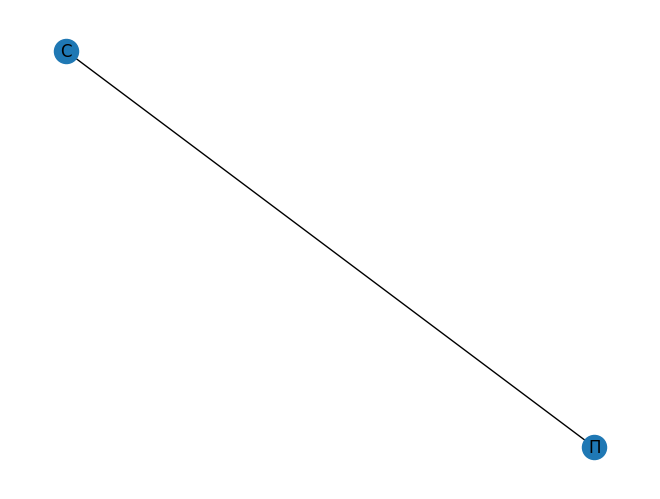

In [26]:
g = nx.Graph()
g.add_node('П')
g.add_node('С')
g.add_edge('П','С')
nx.draw(g, with_labels=True)

<div class="alert alert-info">

Вершины — это точки данных, наши Петя и Света, а связь между ними задана ребром.

В данном примере мы создали пустой граф, а потом добавили поочередно вершины и ребро между ними, но в `NetworkX` есть возможность добавлять сразу несколько вершин или рёбер. С помощью методов: `add_nodes_from()` и `add_edges_from()`, в которые можно передавать элементы списком.

Давайте добавим к семье ещё двух взрослых детей, Витю и Лену.

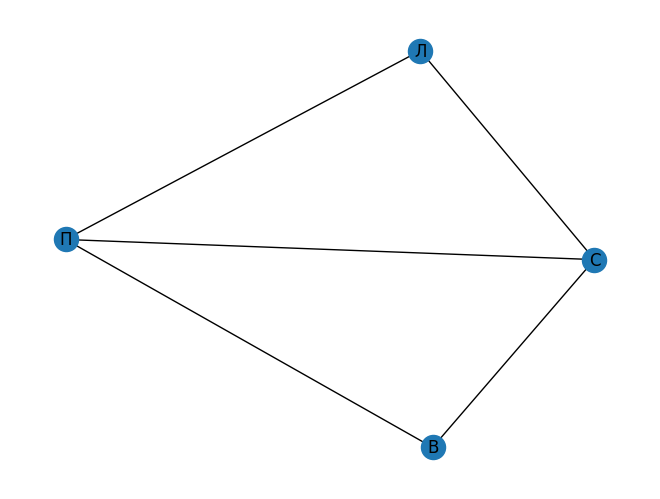

In [27]:
g.add_nodes_from(['В','Л'])
g.add_edges_from([('В','П'),('В','С'),('Л','П'),('Л','С')])
nx.draw(g, with_labels=True)

Рекомендую использовать этот способ, так и удобнее и быстрее для больших графов.

Граф мы создали, но у нас всё ещё нет фичей. Давайте добавим их.

Добавим сумму выплаченных кредитов и их количество.

Удобно добавить атрибуты к вершинам можно с помощью функции `set_node_attributes`. Она принимает на вход словарь словарей и транспонированный DataFrame в качестве такого сгодится.

In [28]:
feat = {'П':{'sum':2000000,'count':10},
        'С':{'sum':1000000,'count':4},
        'В':{'sum':40000,'count':1},
        'Л':{'sum':0,'count':0},}

feat = pd.DataFrame(feat).T
feat

,sum,count
П,2000000,10
С,1000000,4
В,40000,1
Л,0,0


In [29]:
nx.set_node_attributes(g, feat.T)

In [30]:
g.nodes.data()

NodeDataView({'П': {'sum': 2000000, 'count': 10}, 'С': {'sum': 1000000, 'count': 4}, 'В': {'sum': 40000, 'count': 1}, 'Л': {'sum': 0, 'count': 0}})

# <center>Более сложные фичи из `NetworkX`.</center>
<img src='../images/centralities.jpg' />

<div class="alert alert-info">

Центральность (centrality) - степень важности вершины:
* `nx.degree_centrality(G)` - чем больше соседей, тем важнее
* `nx.betweenness_centrality(G)` - cтепень посредничества
* `nx.closeness_centrality(G)` - степень близости

Для демонстрации этих признаков возьмём датасет, содержащий все связи героев из вселенной "Звёздных войн".

In [31]:
import json
import requests
from collections import Counter
from networkx.readwrite import json_graph

# Загружаем датасет
path = 'https://raw.githubusercontent.com/evelinag/StarWars-social-network/master/networks/starwars-full-interactions.json'
interactions = json.loads(requests.get(path).content)

In [32]:
interactions['nodes'][:10]

[{'name': 'QUI-GON', 'value': 61, 'colour': '#4f4fb1'},
 {'name': 'NUTE GUNRAY', 'value': 24, 'colour': '#808080'},
 {'name': 'PK-4', 'value': 3, 'colour': '#808080'},
 {'name': 'TC-14', 'value': 4, 'colour': '#808080'},
 {'name': 'OBI-WAN', 'value': 147, 'colour': '#48D1CC'},
 {'name': 'DOFINE', 'value': 3, 'colour': '#808080'},
 {'name': 'RUNE', 'value': 10, 'colour': '#808080'},
 {'name': 'TEY HOW', 'value': 4, 'colour': '#808080'},
 {'name': 'EMPEROR', 'value': 51, 'colour': '#191970'},
 {'name': 'CAPTAIN PANAKA', 'value': 19, 'colour': '#808080'}]

In [33]:
interactions['links'][:10]

[{'source': 1, 'target': 0, 'value': 1},
 {'source': 2, 'target': 3, 'value': 1},
 {'source': 4, 'target': 3, 'value': 1},
 {'source': 0, 'target': 3, 'value': 1},
 {'source': 4, 'target': 0, 'value': 26},
 {'source': 1, 'target': 3, 'value': 1},
 {'source': 5, 'target': 1, 'value': 1},
 {'source': 5, 'target': 3, 'value': 1},
 {'source': 1, 'target': 6, 'value': 8},
 {'source': 6, 'target': 7, 'value': 2}]

In [34]:
interactions['directed'] = False
interactions['multigraph'] = False
interactions['graph'] = {}

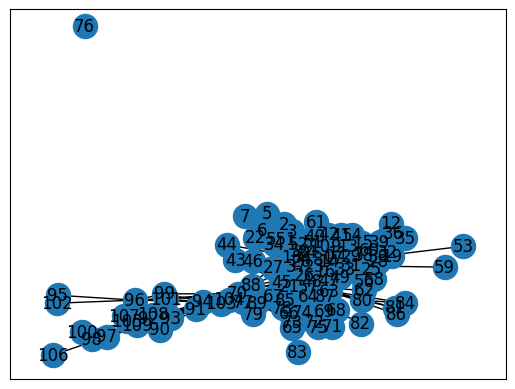

In [35]:
G = json_graph.node_link_graph(interactions)
nx.draw_networkx(G)

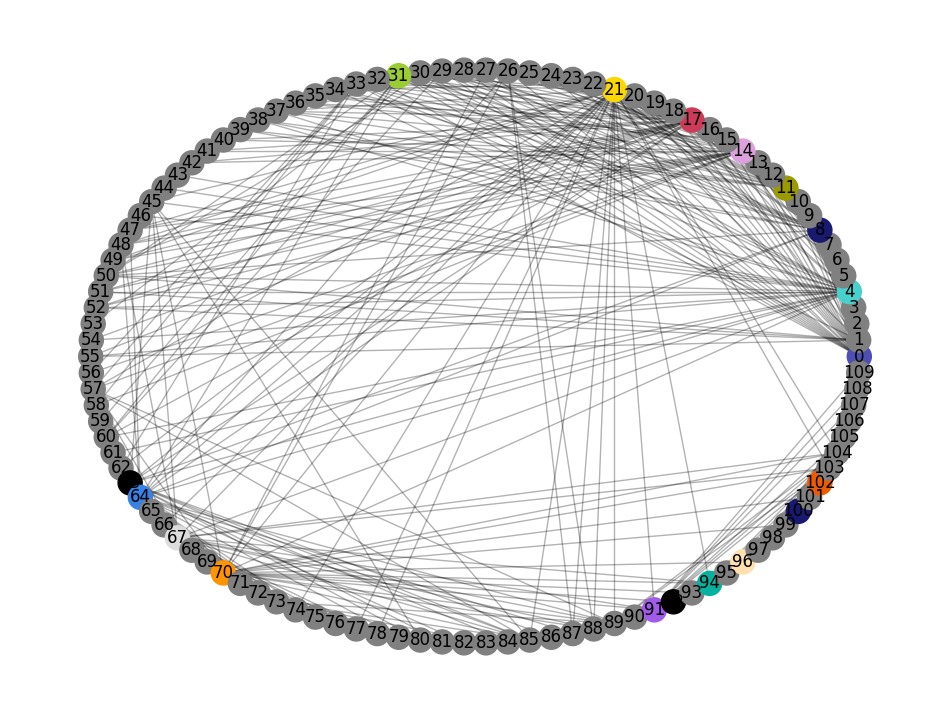

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 9]

clrs = np.array([n[1]['colour'] for n in G.nodes.data()])
labels = {n[0]: n[1]['name'] for n in G.nodes.data()}

pos=nx.circular_layout(G)

nx.draw_networkx_nodes(G,
                       pos=pos,
                       node_color=clrs,
                       )

nx.draw_networkx_edges(G,
                       pos=pos,
                       alpha=0.3,
                       label={n[0]: n[1]['name'] for n in G.nodes.data()})

nx.draw_networkx_labels(G, pos=pos)
plt.axis('off')
plt.show()

### Degree centrality - чем больше соседей, тем важнее
<div class="alert alert-info">

Смысл этой самой простой меры основан на допущении, что тот, кто обладает большим количеством связей (отношений) с другими, занимает центральное положение в локальной общности. Иными словами, центральным можно считать того, кто связан с наибольшим числом членов группы. DС - это отношение количества связей определенного узла к общему количеству других узлов.


In [37]:
degree_centrality = nx.degree_centrality(G)
degree_centrality_counts = Counter(degree_centrality)
for k, v in degree_centrality_counts.most_common(10):

    print(G.nodes[k]['name'], v)

ANAKIN 0.3761467889908257
OBI-WAN 0.3211009174311927
PADME 0.30275229357798167
C-3PO 0.30275229357798167
QUI-GON 0.23853211009174313
JAR JAR 0.22018348623853212
LUKE 0.22018348623853212
HAN 0.21100917431192662
EMPEROR 0.2018348623853211
LEIA 0.1926605504587156


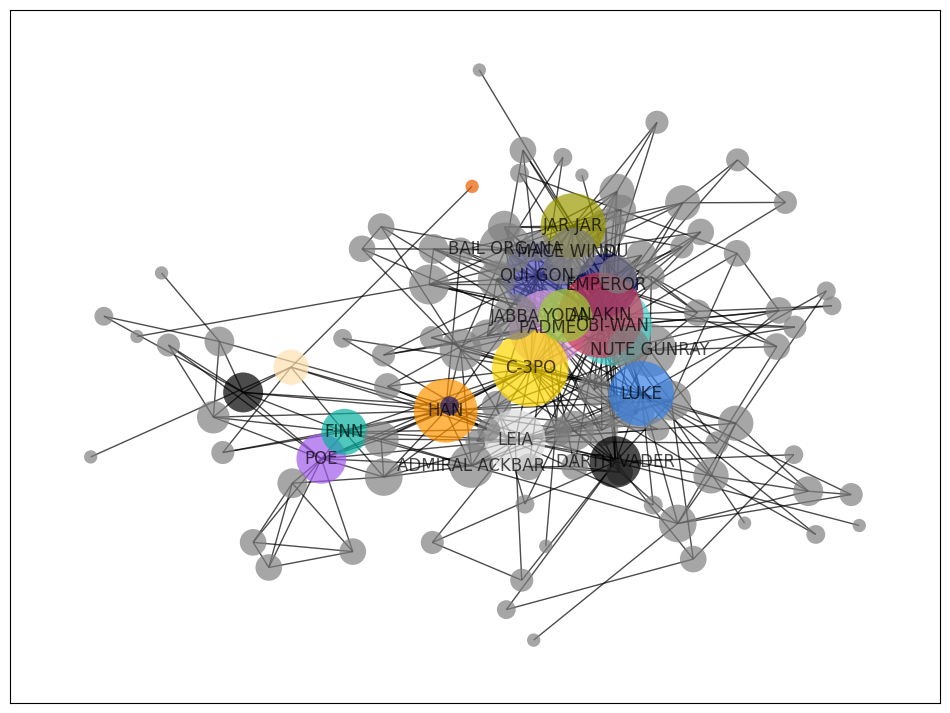

In [38]:
pos=nx.spring_layout(G, k=5*1/np.sqrt(len(G.nodes()))) # Фиксируем случайность
th = degree_centrality_counts.most_common(20)[-1][1]
nx.draw_networkx(
    G,
    node_color=clrs,
    with_labels=True,
    alpha=0.7,
    labels={n[0]: n[1]['name'] for n in G.nodes.data() if degree_centrality[n[0]] > th},
    node_size=np.array(list(degree_centrality.values())) * 10000,
    linewidths=0.01,
    pos=pos,
)

### Betweenness centrality (Степень посредничества)
<div class="alert alert-info">

позволяет ранжировать вершины в графе, то есть оценить их важность с точки зрения количества проходящих через них путей.


<img src='../images/centrality.mp4' />


На иллюстрации между каждой парой вершин в графе курсирует по одной частице; частицы двигаются только по кратчайшим путям. Каждый раз, когда через вершину графа проходит какая-либо частица, счетчик вершины увеличивается. Чем больше значение счетчика, тем больше радиус вершины, который характеризует "центральность" вершины.



In [39]:
betweenness_centrality = nx.betweenness_centrality(G)
betweenness_centrality_counts = Counter(betweenness_centrality)

for k, v in betweenness_centrality_counts.most_common(10):
    print(G.nodes[k]['name'], v)

OBI-WAN 0.21289741830262351
C-3PO 0.1926808487468285
HAN 0.1812153961936558
ANAKIN 0.1621708391273783
LUKE 0.137821617635291
DARTH VADER 0.0880518038555187
POE 0.08361809147724517
EMPEROR 0.07433337936695311
PADME 0.06946928856235446
KYLO REN 0.05646104121849159


### Closeness centrality (Степень близости)

Центральность по близости выражает, насколько близко узел расположен к остальным узлам сети.


<div class="alert alert-info">

Степень близости узла — это мера центральности в сети, вычисляемая как обратная величина суммы длин кратчайших путей между узлом и всеми другими узлами графа. Таким образом, чем более централен узел, тем ближе он ко всем другим узлам.

In [40]:
closeness_centrality = nx.closeness_centrality(G)

closeness_centrality_counts = Counter(closeness_centrality)
for k, v in closeness_centrality_counts.most_common(10):
    print(G.nodes[k]['name'], v)

OBI-WAN 0.5515936820202403
C-3PO 0.5487649964714185
ANAKIN 0.5377345442810383
LUKE 0.5144671841919549
HAN 0.5047602561883331
EMPEROR 0.4908677720730579
PADME 0.48202330771138113
DARTH VADER 0.48202330771138113
LEIA 0.47986176821491755
QUI-GON 0.4693384838242395


Так, что такое граф разобрались, как фичи добавлять знаем, а как это использовать в ML?

Есть два способа, графовые алгоритмы и графовые нейронные сети. Здесь мы рассмотрим первый способ, а поможет нам с этим швейцарский нож для графов: библиотека `karate-club.`

<center> <img src='https://karateclub.readthedocs.io/en/latest/_static/karate_logo_text.jpg' width='300' height='100' /> </center>

* Karate-club простая либа с sklearn-подобным API.
* Ставится через conda или pip, лучше через conda с pip могут быть проблемы.

In [41]:
!pip install karateclub -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.5/64.5 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 53.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 66.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 74.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 78.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 85.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.21.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 1.3.5 which is incompatible.
chex 0.1.85 requires numpy>=1.24.1, but you have numpy 1.22.4 which is incompatible.
featuretools 1.29.0 requires pandas>=1.5

In [ ]:
#!conda install karateclub > _

<div class="alert alert-info">

Обученная модель имеет 3 метода:
* `get_embedding` - возвращает ембеддинги узлов
* `get_memberships` - возвращает словарь с принадлежностью узла к тому или иному сообществу; или None
* `get_cluster_centers` - возвращает словарь с информацией является ли узел центром какого-либо сообщества; или None

Для начала посмотрим пример использования на простом алгоритме `DeepWalk`.

In [42]:
from karateclub import DeepWalk

model = DeepWalk()
model.fit(G)
embedding = model.get_embedding()
print(embedding.shape)
embedding

(110, 128)


array([[ 0.23625316, -0.11499219,  0.05822323, ...,  0.02780985,
         0.2662718 ,  0.12564729],
       [ 0.07913787, -0.2104752 ,  0.37200937, ...,  0.5789175 ,
         0.89382845, -0.3531492 ],
       [-0.1602411 , -0.19977544,  0.7691918 , ...,  0.05833651,
         0.50188494, -1.3186884 ],
       ...,
       [ 0.5640036 ,  0.09073468, -0.8054235 , ...,  0.26589814,
        -0.6524641 , -0.4358029 ],
       [ 0.55479497,  0.05209317, -0.7967831 , ...,  0.38603738,
        -0.69575506, -0.20319733],
       [ 0.38885987,  0.15158811, -0.6101496 , ...,  0.45692796,
        -0.7426846 , -0.48721942]], dtype=float32)

<div class="alert alert-info">

Теперь разберём более сложный алгоритм `Node2Vec`.

Как вы наверное уже догадались, он тоже преобразует вершины в эмбендинги. Как он это делает? Как и большинство графовых алгоритмов, `Node2Vec` получает структурную информацию из случайных блужданий по графу. Ну или не совсем случайных, поскольку вероятность перехода на новую вершину и уже посещённую регулируемы. При блужданиях создаётся последовательность из вершин, на которой уже модель `Skip-Gram` обучается угадывать пропуски в вершинах, так же как в тексте `word2vec` пытается угадывать пропуски слов.

Создаём модель. У `Node2Vec` есть много параметров, таких как количество и длина случайных блужданий, количество эпох и т.д., но нам интересен больше всего параметр dimensions, это размерность наших эмбендингов. Сделаем его для примера равным 64.

In [43]:
from karateclub import Node2Vec

n2v = Node2Vec(dimensions=64)

In [44]:
n2v.fit(G)
embeddings = n2v.get_embedding()

In [45]:
embeddings.shape

(110, 64)

<div class="alert alert-info">

В заключение хочется сказать, что хоть `Node2Vec` и неплохой алгоритм, но он появился аж в 16-ом году, а в `karate-club` есть алгоритмы и посвежее, так что, если `Node2Vec` не поднимает вас на LB, пробуйте новое, не бойтесь экспериментировать.

И не стесняйтесь заглянуть в доку к [NetworkX](https://networkx.org/documentation/stable/tutorial.html) и [karate-club](https://karateclub.readthedocs.io/en/latest/index.html) за подробностями, они довольно подробные и хорошо написаны.

# <center>🥒 [TSfresh](https://tsfresh.readthedocs.io/en/latest/) - твой помощник по временным рядам </center> <p id="c4"></p>
<center> <img src='https://tsfresh.readthedocs.io/en/latest/_images/tsfresh_logo.svg' width='300' height='100' /> </center>

<div class="alert alert-info">
    

***TSfresh*** - библиотека, которая автоматически считает большое количество признаков для временных рядов. Так же содержит инструменты для интерпретации силы и важности этих признаков в задачах регрессии и классификации.
Теперь сгенерируем фичи для временных рядов.

In [46]:
!pip install tsfresh -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.8/95.8 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.1/169.1 kB 9.4 MB/s eta 0:00:00


Подгрузим данные:

In [49]:
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, \
    load_robot_execution_failures

download_robot_execution_failures()
timeseries, y = load_robot_execution_failures()
timeseries

,id,time,F_x,F_y,F_z,T_x,T_y,T_z
0,1,0,-1,-1,63,-3,-1,0
1,1,1,0,0,62,-3,-1,0
2,1,2,-1,-1,61,-3,0,0
3,1,3,-1,-1,63,-2,-1,0
4,1,4,-1,-1,63,-3,-1,0
...,...,...,...,...,...,...,...,...
1315,88,10,-10,2,39,-21,-24,5
1316,88,11,-11,2,38,-24,-22,6
1317,88,12,-12,3,23,-24,-24,5
1318,88,13,-13,4,26,-29,-27,5


In [50]:
timeseries.id.nunique()

88

<div class="alert alert-info">

***TSFresh*** автоматически извлекает более 100 паттернов из временного ряда. Эти характеристики описывают основные факторы, такие как количество пиков и средние или максимальные значения, а также более сложные факторы, такие как симметричное распределение.
    
<center> <img src='https://uproger.com/wp-content/uploads/2023/01/1_yem6zk9xwuzw51v319whmq.webp' width='500' height='400' /> </center>

В ***TSfresh*** генерация признаков происходит на основе словаря, который передается в параметр `default_fc_parameters`. Какой словарь туда передадим столько признаков по каждому ряду будет сгенерировано. Словарь состоит из т.н. "калькуляторов фичей". Но в параметр передается не сам словарь, а объект, который возвращает словарь при вызове. Так же стоит отметить, что некоторые вычислители имеют дополнительные аттрибуты и на выходе может получится более 100 признаков.<br>
Посмотрим на список таких объектов:

* `ComprehensiveFCParameters` (по умолчанию) - полный набор вычислителей - 75 штук (фичей более 100).
* `EfficientFCParameters` - все вычислители кроме самых вычислительно затратных 73 штуки :)
* `MinimalFCParameters` - минимальный набор базовых вычислителей 10 штук.<br>
Так же можно добавлять или удалять вычислители из этих словарей или добавить свои собственные кастомные вычислители. <br>
Полное описание всех возможных вычислителей фичей смотрите по [ссылке](https://tsfresh.readthedocs.io/en/latest/text/list_of_features.html)

In [51]:
# Посмотрим на набор признаков в MinimalFCParameters
from tsfresh.feature_extraction import MinimalFCParameters
from pprint import pprint

pprint(MinimalFCParameters())

{'absolute_maximum': None,
 'length': None,
 'maximum': None,
 'mean': None,
 'median': None,
 'minimum': None,
 'root_mean_square': None,
 'standard_deviation': None,
 'sum_values': None,
 'variance': None}


In [52]:
from tsfresh import extract_features

extracted_features = extract_features(timeseries, column_id="id", column_sort="time", n_jobs=2, default_fc_parameters=MinimalFCParameters())
extracted_features.head()

Feature Extraction: 100%|██████████| 10/10 [00:00<00:00, 17.97it/s]


,F_x__sum_values,F_x__median,F_x__mean,F_x__length,F_x__standard_deviation,F_x__variance,F_x__root_mean_square,F_x__maximum,F_x__absolute_maximum,F_x__minimum,...,T_z__sum_values,T_z__median,T_z__mean,T_z__length,T_z__standard_deviation,T_z__variance,T_z__root_mean_square,T_z__maximum,T_z__absolute_maximum,T_z__minimum
1,-14.0,-1.0,-0.933333,15.0,0.249444,0.062222,0.966092,0.0,1.0,-1.0,...,0.0,0.0,0.000000,15.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,-13.0,-1.0,-0.866667,15.0,0.956847,0.915556,1.290994,0.0,3.0,-3.0,...,-4.0,0.0,-0.266667,15.0,0.442217,0.195556,0.516398,0.0,1.0,-1.0
3,-10.0,-1.0,-0.666667,15.0,0.596285,0.355556,0.894427,1.0,1.0,-1.0,...,-4.0,0.0,-0.266667,15.0,0.442217,0.195556,0.516398,0.0,1.0,-1.0
4,-6.0,0.0,-0.400000,15.0,0.952190,0.906667,1.032796,1.0,2.0,-2.0,...,-5.0,0.0,-0.333333,15.0,0.596285,0.355556,0.683130,1.0,1.0,-1.0
5,-9.0,-1.0,-0.600000,15.0,0.879394,0.773333,1.064581,2.0,2.0,-2.0,...,-2.0,0.0,-0.133333,15.0,0.618241,0.382222,0.632456,1.0,1.0,-1.0


tsfresh рассчитал 60 фичей, по 10 на каждый временной ряд.

<div class="alert alert-info">

Пока вы не знаете какие фичи нужны, вам вероятно захочется сгенерировать их все, но после того как вы определитесь с фичами было бы неплохо сократить объем вычислений и рассчитывать только нужные, чтобы не рассчитывать всё фичи можно указать нужные в словаре. Давайте дополним `MinimalFCParameters` 3-мя фичами из списка выше и удалим несколько:

In [53]:
fc_parameters = MinimalFCParameters()
for x in ['sum_values', 'median',  'mean', 'maximum', 'absolute_maximum', 'minimum']:
    del fc_parameters[x]

fc_parameters.update({
     'linear_trend': [{'attr': 'pvalue'}, {'attr': 'slope'}],
     'variance_larger_than_standard_deviation': None,
     'large_standard_deviation': [{'r': 0.05}, {'r': 0.1}]
})
pprint(fc_parameters)

{'large_standard_deviation': [{'r': 0.05}, {'r': 0.1}],
 'length': None,
 'linear_trend': [{'attr': 'pvalue'}, {'attr': 'slope'}],
 'root_mean_square': None,
 'standard_deviation': None,
 'variance': None,
 'variance_larger_than_standard_deviation': None}


In [54]:
extracted_features = extract_features(timeseries, column_id="id", column_sort="time", n_jobs=2, default_fc_parameters=fc_parameters)
extracted_features.head()

Feature Extraction: 100%|██████████| 10/10 [00:00<00:00, 18.98it/s]


,F_x__length,F_x__standard_deviation,F_x__variance,F_x__root_mean_square,"F_x__linear_trend__attr_""pvalue""","F_x__linear_trend__attr_""slope""",F_x__variance_larger_than_standard_deviation,F_x__large_standard_deviation__r_0.05,F_x__large_standard_deviation__r_0.1,F_y__length,...,T_y__large_standard_deviation__r_0.1,T_z__length,T_z__standard_deviation,T_z__variance,T_z__root_mean_square,"T_z__linear_trend__attr_""pvalue""","T_z__linear_trend__attr_""slope""",T_z__variance_larger_than_standard_deviation,T_z__large_standard_deviation__r_0.05,T_z__large_standard_deviation__r_0.1
1,15.0,0.249444,0.062222,0.966092,0.173193,-2.142857e-02,0.0,1.0,1.0,15.0,...,1.0,15.0,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.0,0.0,0.0
2,15.0,0.956847,0.915556,1.290994,1.000000,-1.586033e-18,0.0,1.0,1.0,15.0,...,1.0,15.0,0.442217,0.195556,0.516398,1.000000,1.387779e-18,0.0,1.0,1.0
3,15.0,0.596285,0.355556,0.894427,0.713543,-1.428571e-02,0.0,1.0,1.0,15.0,...,1.0,15.0,0.442217,0.195556,0.516398,0.619819,-1.428571e-02,0.0,1.0,1.0
4,15.0,0.952190,0.906667,1.032796,0.774068,-1.785714e-02,0.0,1.0,1.0,15.0,...,1.0,15.0,0.596285,0.355556,0.683130,1.000000,-2.577303e-18,0.0,1.0,1.0
5,15.0,0.879394,0.773333,1.064581,0.755869,-1.785714e-02,0.0,1.0,1.0,15.0,...,1.0,15.0,0.618241,0.382222,0.632456,0.201747,-5.000000e-02,0.0,1.0,1.0


<div class="alert alert-info">


Также вы можете указывать какие фичи рассчитывать для каждого отдельного временного ряда.

In [55]:
ts_fc_parameters = {
    "F_x": {"mean": None},
    "F_y": {"maximum": None, "minimum": None}
}

In [56]:
extracted_features = extract_features(timeseries, column_id="id", column_sort="time", n_jobs=2, kind_to_fc_parameters=ts_fc_parameters)
extracted_features.head()

Feature Extraction: 100%|██████████| 10/10 [00:00<00:00, 81.87it/s]


,F_x__mean,F_y__maximum,F_y__minimum
1,-0.933333,0.0,-1.0
2,-0.866667,3.0,-4.0
3,-0.666667,2.0,-3.0
4,-0.400000,5.0,-3.0
5,-0.600000,3.0,-3.0


<div class="alert alert-info">
    
Ещё одна классная функция в **TSfresh** - `extract_relevant_features` - в неё следует передать не только временные ряды, но и таргет. И фрэймворк сам подберет необходимые признаки, которые лучше сгенерировать для предсказания таргета.

In [57]:
from tsfresh import extract_relevant_features

extracted_features = extract_relevant_features(timeseries, y, column_id="id", column_sort="time", n_jobs=4)
extracted_features.head()

Feature Extraction: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


,F_x__value_count__value_-1,F_x__abs_energy,F_x__root_mean_square,T_y__absolute_maximum,F_x__mean_n_absolute_max__number_of_maxima_7,F_x__range_count__max_1__min_-1,F_y__abs_energy,F_y__root_mean_square,F_y__mean_n_absolute_max__number_of_maxima_7,T_y__variance,...,"F_y__cwt_coefficients__coeff_14__w_5__widths_(2, 5, 10, 20)","F_y__cwt_coefficients__coeff_13__w_2__widths_(2, 5, 10, 20)",T_y__lempel_ziv_complexity__bins_3,T_y__quantile__q_0.1,F_z__time_reversal_asymmetry_statistic__lag_1,F_x__quantile__q_0.2,F_y__quantile__q_0.7,"T_x__change_quantiles__f_agg_""var""__isabs_False__qh_0.2__ql_0.0",T_z__large_standard_deviation__r_0.35000000000000003,T_z__quantile__q_0.9
1,14.0,14.0,0.966092,1.0,1.000000,15.0,13.0,0.930949,1.000000,0.222222,...,-0.751682,-0.310265,0.400000,-1.0,-596.000000,-1.0,-1.0,0.0,0.0,0.0
2,7.0,25.0,1.290994,5.0,1.571429,13.0,76.0,2.250926,3.000000,4.222222,...,0.057818,-0.202951,0.533333,-3.6,-680.384615,-1.0,-1.0,0.0,1.0,0.0
3,11.0,12.0,0.894427,5.0,1.000000,14.0,40.0,1.632993,2.142857,3.128889,...,0.912474,0.539121,0.533333,-4.0,-617.000000,-1.0,0.0,0.0,1.0,0.0
4,5.0,16.0,1.032796,6.0,1.285714,10.0,60.0,2.000000,2.428571,7.128889,...,-0.609735,-2.641390,0.533333,-4.6,3426.307692,-1.0,1.0,0.0,0.0,0.0
5,9.0,17.0,1.064581,5.0,1.285714,13.0,46.0,1.751190,2.285714,4.160000,...,0.072771,0.591927,0.466667,-5.0,-2609.000000,-1.0,0.8,0.0,0.0,0.6


Видим, что сгенерировалось 682 признака с различными параметрами.

<div class="alert alert-info">

**TSFresh** лекко встраивается в пайплайны sklearn. В примере мы вызовем `RelevantFeatureAugmenter`, который под капотом как раз вызывает функцию `extract_relevant_features`.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from tsfresh.transformers import RelevantFeatureAugmenter

pipeline = Pipeline([
            ('augmenter', RelevantFeatureAugmenter(column_id='id', column_sort='time')),
            ('classifier', RandomForestClassifier()),
            ])
timeseries, y = load_robot_execution_failures()
X = pd.DataFrame(index=y.index)

pipeline.set_params(augmenter__timeseries_container=timeseries)
pipeline.fit(X, y)

<div class="alert alert-info">
    

### Выводы
* **TSFresh** - библиотека с достаточно большим функционалом, у неё так же имеется внутри отбор признаков, широкие возможности для кастомизации, параллелизации, обработки больших датасетов.
* Стоит помнить об ограничениях по памяти при её использовании: если запускать её на дефолтных параметрах, то потребление памяти и вычислительных ресурсов может улетать в небеса, а потом ещё столько же времени понадобится, чтобы отобрать нужные признаки и обучить на них модель.
* При грамотном использовании `TSFresh` может сэкономить много времени и ресурсов.
* Можете ещё попробовать более быстрый аналог библиотеку [`TSfel`](https://tsfel.readthedocs.io/en/latest/).

# <center> 🧸 Заключения и выводы </center>

<div class="alert alert-info">
    
* ⚠️ Не думайте, что одна лишь автогенерация фичей даст вам найти золотоые признаки! Прирост будет, но hand-made никто не отменял.
* 🧩 Бибилиотек для автоматической генерации признаков ещё огомное количество, мы разобрали основные, которыми пользуемся сами.
* 🎓 В этом ноутбуке получился краткий обзор основных функций фрэймворков, хотя по каждому из них можно было сделать отдельный урок или даже целый курс.
* 🧠 Главное, что теперь вы знаете, что есть такой инструметарий, как им пользоваться на базовом уровне, и что он действительно может быть полезен при решении соревнований.
* 🤫 Имея такую базу, вы легко сможете погрузиться более глубоко в тонкости или другие инструменты, изучив документацию или туториалы. <br>

## <center> 🥳 Дерзайте, чемпионы!